# Case Study 1: How does a bike-share navigate speedy success? 


Author  : Man Kit (Michael), Tsang 

Date    : 4 Feb 2026 

Data Source: Retrieved from https://divvy-tripdata.s3.amazonaws.com/index.html


In [123]:
## Import Library
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [124]:
## Importing Datasets, with filtering
path = "Dataset/Original_csv_files/"
selected_cols = ["ride_id", "rideable_type", "started_at","ended_at", "member_casual"]

df_2502 = pd.read_csv(path + "202502-divvy-tripdata.csv", usecols=selected_cols)
df_2503 = pd.read_csv(path + "202503-divvy-tripdata.csv", usecols=selected_cols)
df_2504 = pd.read_csv(path + "202504-divvy-tripdata.csv", usecols=selected_cols)
df_2505 = pd.read_csv(path + "202505-divvy-tripdata.csv", usecols=selected_cols) 
df_2506 = pd.read_csv(path + "202506-divvy-tripdata.csv", usecols=selected_cols)
df_2507 = pd.read_csv(path + "202507-divvy-tripdata.csv", usecols=selected_cols)
df_2508 = pd.read_csv(path + "202508-divvy-tripdata.csv", usecols=selected_cols)
df_2509 = pd.read_csv(path + "202509-divvy-tripdata.csv", usecols=selected_cols)
df_2510 = pd.read_csv(path + "202510-divvy-tripdata.csv", usecols=selected_cols)
df_2511 = pd.read_csv(path + "202511-divvy-tripdata.csv", usecols=selected_cols)
df_2512 = pd.read_csv(path + "202512-divvy-tripdata.csv", usecols=selected_cols)
df_2601 = pd.read_csv(path + "202601-divvy-tripdata.csv", usecols=selected_cols)

In [125]:
## Defining helper functions 

def ride_len(df):
    df["started_at"]  = pd.to_datetime(df["started_at"], format="ISO8601")
    df["ended_at"]    = pd.to_datetime(df["ended_at"], format="ISO8601")
    df["ride_length_tmp"] = (df["ended_at"] - df["started_at"]).dt.total_seconds()/60

    # Filtering low values (ride time lower than 00:01:00)
    df["ride_length"] = df["ride_length_tmp"]
    df = df[df["ride_length"]>=1]
    return df

def weekday(df): 
    df["day_of_week"] = df["started_at"].dt.day_name()
    return df

def weekday_cat(df):
    days = ["Sunday", "Monday", "Tuesday", "Wednesday", 
            "Thursday", "Friday", "Saturday"]
    df["day_of_week"] = pd.Categorical(df["day_of_week"], categories=days, ordered=True)
    return df

def reduce_cols(df):
    return_cols = ["ride_id", "rideable_type", "started_at","ended_at", 
                   "member_casual", "ride_length", "day_of_week"]
    return df[return_cols]

In [126]:
## Joining csv files 
df_list = [df_2502, df_2503, df_2504, df_2505, df_2506, df_2507,
           df_2508, df_2509, df_2510, df_2511, df_2512, df_2601]

processed_list = [] 
for df in df_list: 
    df_tmp = ride_len(df) 
    df_tmp = weekday(df_tmp) 
    df_tmp = weekday_cat(df_tmp)
    df_tmp = reduce_cols(df_tmp)
    processed_list.append(df_tmp)

## The dataframe df_full is the full dataframe with the previous 12 month data. 
df_full = pd.concat(processed_list, ignore_index=True)

In [127]:
## Basic stucture of the data_df, such as datatype and variable name. 
df_full.info()

<class 'pandas.DataFrame'>
RangeIndex: 5403691 entries, 0 to 5403690
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        str           
 1   rideable_type  str           
 2   started_at     datetime64[us]
 3   ended_at       datetime64[us]
 4   member_casual  str           
 5   ride_length    float64       
 6   day_of_week    category      
dtypes: category(1), datetime64[us](2), float64(1), str(3)
memory usage: 252.5 MB


In [128]:
## Basic description of all numerical variables 
df_full.describe()

,started_at,ended_at,ride_length
count,5403691,5403691,5.403691e+06
mean,2025-07-29 16:24:29.950839,2025-07-29 16:41:01.658662,1.652846e+01
min,2025-01-31 22:13:16.925000,2025-02-01 00:00:10.352000,1.000000e+00
25%,2025-06-03 19:47:36.502500,2025-06-03 20:04:27.067500,5.686783e+00
50%,2025-08-01 12:38:03.668000,2025-08-01 12:56:10.908000,9.698117e+00
75%,2025-09-26 19:23:53.029500,2025-09-26 19:40:05.776000,1.688747e+01
max,2026-01-31 23:56:54.069000,2026-01-31 23:59:33.214000,1.574900e+03
std,NaN,NaN,5.649900e+01


In [129]:
## Summarizing the number of causal users and members
df_full["member_casual"].value_counts()

member_casual
member    3482719
casual    1920972
Name: count, dtype: int64

In [130]:
## Summarizing the number of users in each month 
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

df_full["month"] = pd.Categorical(df_full["started_at"].dt.month_name(), categories=month_order, ordered=True)
df_full["hour"] = df_full["started_at"].dt.hour

monthly_rides = df_full.groupby(["month", "member_casual"]).size().unstack()
hourly_rides = df_full.groupby(["hour", "member_casual"]).size().unstack()

In [131]:
## Summary statistics as required
### Contains information of number of riders on each day of week,
### with the average duration and member type. 
summary_stats = df_full.groupby(["member_casual", "day_of_week"]).agg(
    number_of_rides=("ride_id", "count"),
    average_duration=("ride_length", "mean")
    ).reset_index()
print(summary_stats)

   member_casual day_of_week  number_of_rides  average_duration
0         casual      Sunday           318480         27.300082
1         casual      Monday           220280         23.188409
2         casual     Tuesday           218800         20.593069
3         casual   Wednesday           212183         19.443115
4         casual    Thursday           247670         20.650725
5         casual      Friday           307148         23.492682
6         casual    Saturday           396411         26.412935
7         member      Sunday           374492         13.933335
8         member      Monday           494937         12.231451
9         member     Tuesday           558517         12.225515
10        member   Wednesday           538722         12.084319
11        member    Thursday           560394         12.203056
12        member      Friday           517005         12.652988
13        member    Saturday           438652         13.883803


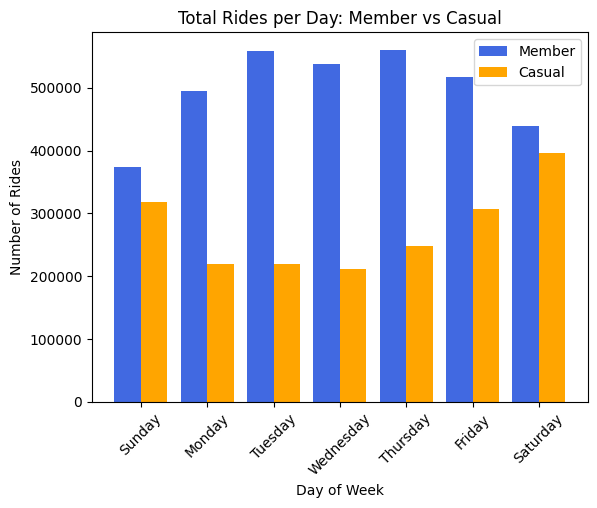

In [132]:
## Ploting of Summary Statistics - 1 
member = summary_stats[summary_stats["member_casual"] == "member"]
casual = summary_stats[summary_stats["member_casual"] == "casual"]

x = np.arange(len(member["day_of_week"])) 
width = 0.4

plt.bar(x - width/2, member["number_of_rides"], width, label = "Member", color = "royalblue")
plt.bar(x + width/2, casual["number_of_rides"], width, label = "Casual", color = "orange")

plt.title("Total Rides per Day: Member vs Casual")
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")
plt.xticks(x, member["day_of_week"], rotation = 45)

plt.legend()
plt.show()

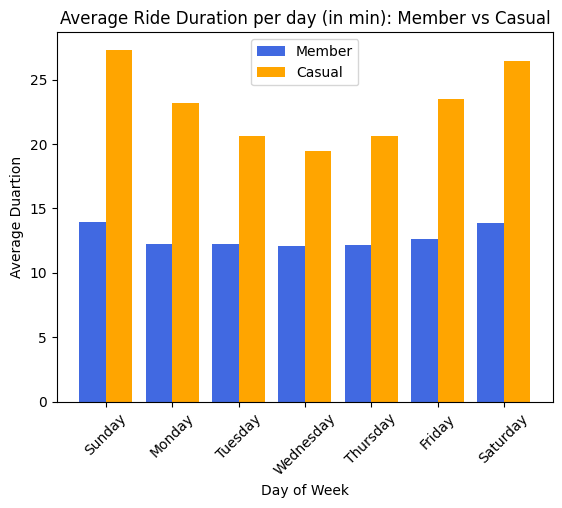

In [133]:
## Ploting of Summary Statistics - 2 
member = summary_stats[summary_stats["member_casual"] == "member"]
casual = summary_stats[summary_stats["member_casual"] == "casual"]

x = np.arange(len(member["day_of_week"])) 
width = 0.4

plt.bar(x - width/2, member["average_duration"], width, label = "Member", color = "royalblue")
plt.bar(x + width/2, casual["average_duration"], width, label = "Casual", color = "orange")

plt.title("Average Ride Duration per day (in min): Member vs Casual")
plt.xlabel("Day of Week")
plt.ylabel("Average Duartion")
plt.xticks(x, member["day_of_week"], rotation = 45)

plt.legend()
plt.show()

In [134]:
## Additional Summary Statistics (Monthly Data) 
### Contains information of number of riders in each month,
### with the average duration and member type. 
summary_stats_1 = df_full.groupby(["member_casual", "month"]).agg(
    number_of_rides=("ride_id", "count"),
    average_duration=("ride_length", "mean")
    ).reset_index()
print(summary_stats_1)

   member_casual      month  number_of_rides  average_duration
0         casual    January            23964         18.177985
1         casual   February            27051         15.020596
2         casual      March            83064         21.459071
3         casual      April           105528         22.416300
4         casual        May           176162         25.086302
5         casual       June           279570         26.495826
6         casual       July           309293         25.485963
7         casual     August           324165         24.590723
8         casual  September           255223         22.427338
9         casual    October           214849         21.327565
10        casual   November            94930         18.763317
11        casual   December            27173         17.528154
12        member    January           109969         13.017594
13        member   February           122118         10.214051
14        member      March           208500         11

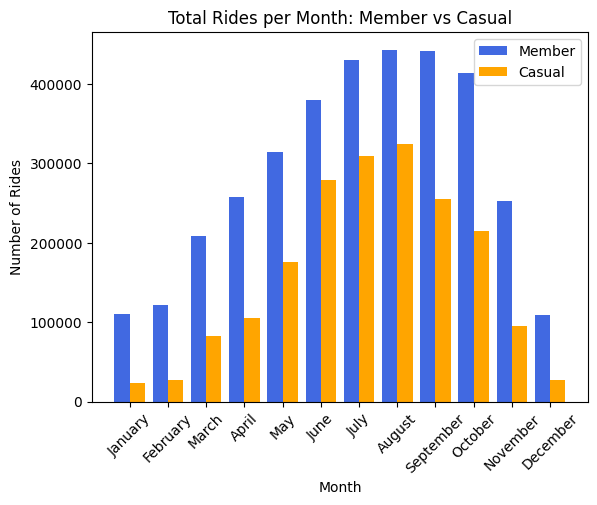

In [135]:
## Ploting of Summary Statistics (Monthly Data) - 1 
member = summary_stats_1[summary_stats_1["member_casual"] == "member"]
casual = summary_stats_1[summary_stats_1["member_casual"] == "casual"]

x = np.arange(len(member["month"])) 
width = 0.4

plt.bar(x - width/2, member["number_of_rides"], width, label = "Member", color = "royalblue")
plt.bar(x + width/2, casual["number_of_rides"], width, label = "Casual", color = "orange")

plt.title("Total Rides per Month: Member vs Casual")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(x, member["month"], rotation = 45)

plt.legend()
plt.show()

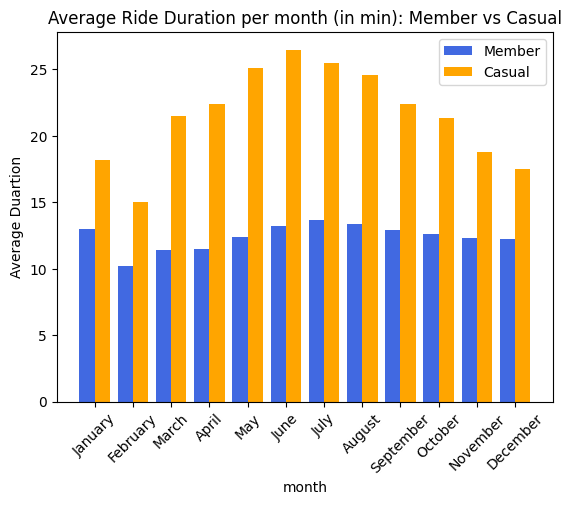

In [136]:
## Ploting of Summary Statistics (Monthly Data) - 2 
member = summary_stats_1[summary_stats_1["member_casual"] == "member"]
casual = summary_stats_1[summary_stats_1["member_casual"] == "casual"]

x = np.arange(len(member["month"])) 
width = 0.4

plt.bar(x - width/2, member["average_duration"], width, label = "Member", color = "royalblue")
plt.bar(x + width/2, casual["average_duration"], width, label = "Casual", color = "orange")

plt.title("Average Ride Duration per month (in min): Member vs Casual")
plt.xlabel("month")
plt.ylabel("Average Duartion")
plt.xticks(x, member["month"], rotation = 45)

plt.legend()
plt.show()

In [137]:
## Additional Summary Statistics (Hourly Data)
### Contains information of number of riders in each hour,
### with the average duration and member type. 
summary_stats_2 = df_full.groupby(['member_casual', 'hour']).agg(
    number_of_rides=('ride_id', 'count'),
    average_duration=('ride_length', 'mean')
    ).reset_index()
print(summary_stats_2)

   member_casual  hour  number_of_rides  average_duration
0         casual     0            36824         22.650550
1         casual     1            23463         23.385154
2         casual     2            15717         24.745909
3         casual     3             8763         27.816973
4         casual     4             6947         19.453567
5         casual     5            11110         18.696724
6         casual     6            25794         16.386063
7         casual     7            48056         16.505504
8         casual     8            68235         18.247691
9         casual     9            68464         23.793617
10        casual    10            82535         27.396720
11        casual    11           105315         27.715862
12        casual    12           123879         26.385354
13        casual    13           126935         26.511637
14        casual    14           133649         26.776785
15        casual    15           148452         24.424690
16        casu

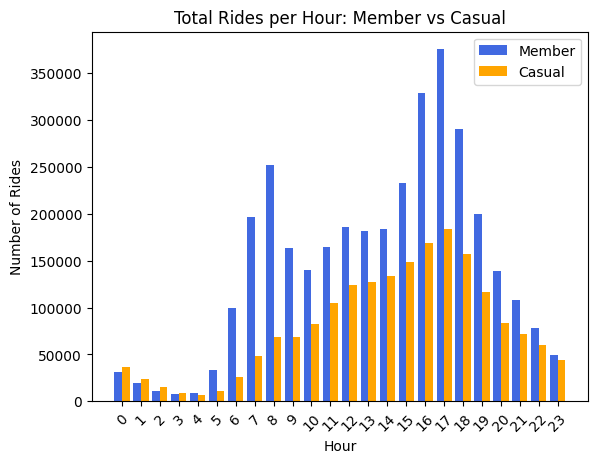

In [138]:
## Ploting of Summary Statistics (Hourly Data) - 1 
member = summary_stats_2[summary_stats_2["member_casual"] == "member"]
casual = summary_stats_2[summary_stats_2["member_casual"] == "casual"]

x = np.arange(len(member["hour"])) 
width = 0.4

plt.bar(x - width/2, member["number_of_rides"], width, label = "Member", color = "royalblue")
plt.bar(x + width/2, casual["number_of_rides"], width, label = "Casual", color = "orange")

plt.title("Total Rides per Hour: Member vs Casual")
plt.xlabel("Hour")
plt.ylabel("Number of Rides")
plt.xticks(x, member["hour"], rotation = 45)

plt.legend()
plt.show()

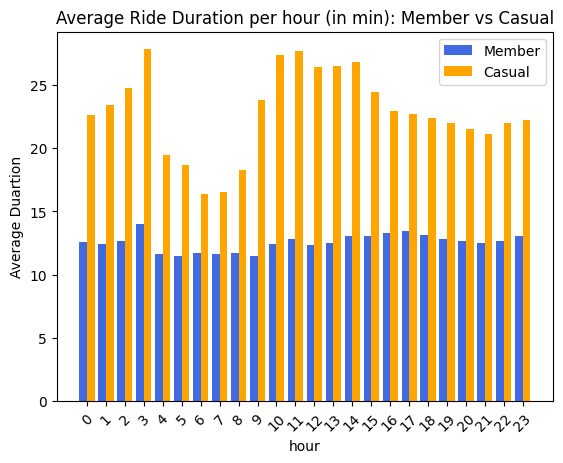

In [139]:
## Ploting of Summary Statistics (Monthly Data) - 2 
member = summary_stats_2[summary_stats_2["member_casual"] == "member"]
casual = summary_stats_2[summary_stats_2["member_casual"] == "casual"]

x = np.arange(len(member["hour"])) 
width = 0.4

plt.bar(x - width/2, member["average_duration"], width, label = "Member", color = "royalblue")
plt.bar(x + width/2, casual["average_duration"], width, label = "Casual", color = "orange")

plt.title("Average Ride Duration per hour (in min): Member vs Casual")
plt.xlabel("hour")
plt.ylabel("Average Duartion")
plt.xticks(x, member["hour"], rotation = 45)

plt.legend()
plt.show()

In [140]:
## Exporting Weekday Data 
summary_stats.to_csv('weekly_data.csv', index=False)

## Exporting Monthly Data 
summary_stats_1.to_csv('monthly_data.csv', index=False)

## Exporting Hourly Data 
summary_stats_2.to_csv('hourly_data.csv', index=False)